## 참고 사이트

+ http://matplotlib.org
+ http://seaborn.pydata,org

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

### 1. 선 그래프

<AxesSubplot:>

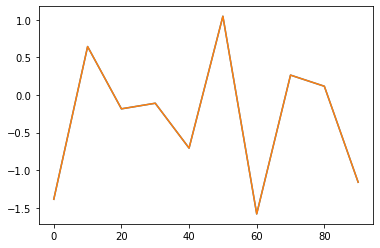

In [7]:
s = pd.Series(np.random.randn(10), index=np.arange(0, 100, 10))
s

s.plot()
s.plot.line()

<AxesSubplot:>

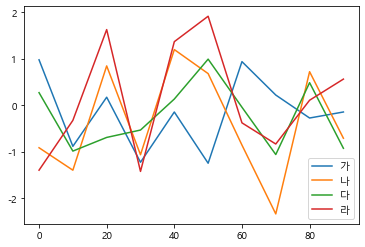

In [17]:
df1 = pd.DataFrame(np.random.randn(10, 4), columns=["가", "나", "다", "라"],
                  index=np.arange(0, 100, 10))
df1
df1.plot()

<AxesSubplot:>

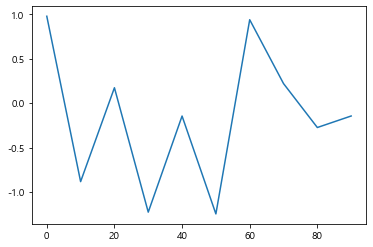

In [18]:
df1["가"].plot()

### 2. 막대 그래프

<AxesSubplot:>

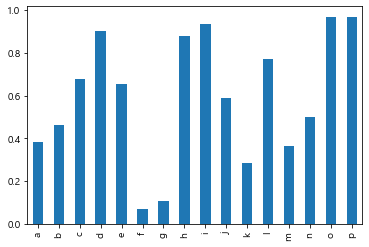

In [21]:
s2 = pd.Series(np.random.rand(16), index=list("abcdefghijklmnop"))
s2

s2.plot(kind="bar")
s2.plot.bar()

<AxesSubplot:>

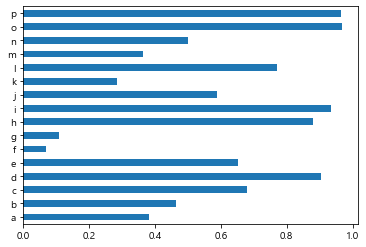

In [23]:
s2.plot(kind="barh")
s2.plot.barh()

<AxesSubplot:>

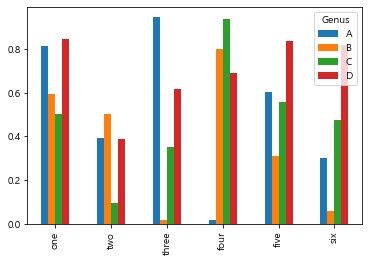

In [27]:
df2 = pd.DataFrame(np.random.rand(6, 4), index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df2

df2.plot(kind="bar")

<AxesSubplot:>

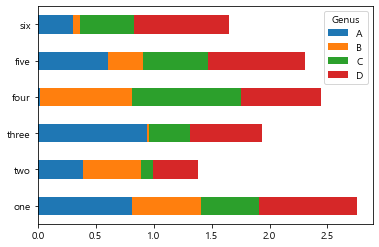

In [30]:
df2.plot(kind="barh", stacked=True)

### 3. histogram

+ X변수가 가질 수 있는 값의 범위
+ 값만 필요하고 인덱스가 필요 없다.

<AxesSubplot:>

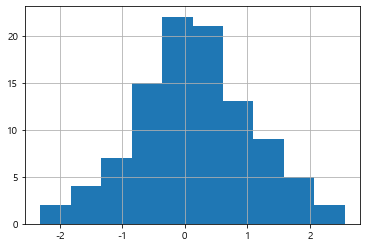

In [36]:
s = pd.Series(np.random.normal(0, 1, size=100))
s

s.hist()

<AxesSubplot:>

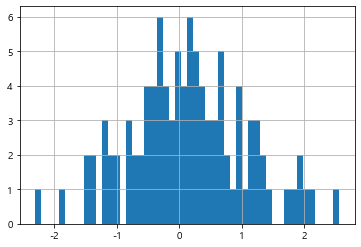

In [37]:
s.hist(bins=50)

### 4. 산포도(산점도, scatter plot)

+ 두 변수의 관계를 확인 : 양, 음, 0

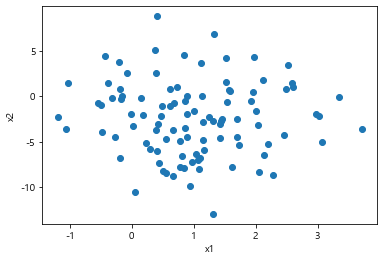

In [15]:
x1 = np.random.normal(1, 1, size=(100, 1))
x1

x2 = np.random.normal(-2, 4, size=(100, 1))
x2

x = np.concatenate((x1, x2), axis=1)
x[:5]

df = pd.DataFrame(x, columns=["x1", "x2"])
df

df.plot.scatter("x1", "x2")
plt.scatter(df["x1"], df["x2"])

### 5. 상자 그래프(box plot)

<AxesSubplot:>

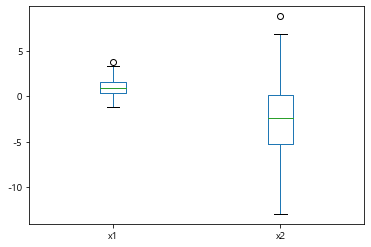

In [16]:
df.plot.box()

### 6. 활용 예제1

+ seaborn의 tips 샘플

#### (1) 데이터 준비

In [17]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### (2) total_bill에 대한 금액 분포 확인

Text(0, 0.5, 'total_bill')

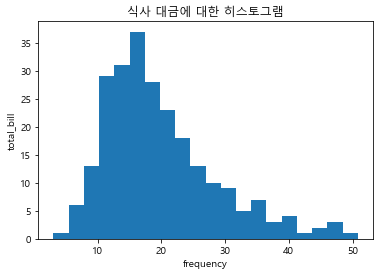

In [22]:
# tips["total_bill"].hist()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.hist(tips["total_bill"], bins=20)
ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("total_bill")

#### (2) total_bill과 tip의 관계를 알고 싶다.

Text(0, 0.5, 'Tip')

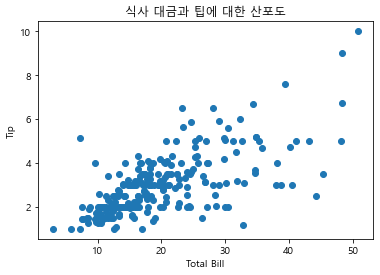

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tips["total_bill"], tips["tip"])
ax.set_title("식사 대금과 팁에 대한 산포도")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

#### (3) 성별에 따른 total_bill과 tip의 관계를 알고 싶다.

Text(0, 0.5, 'Tip')

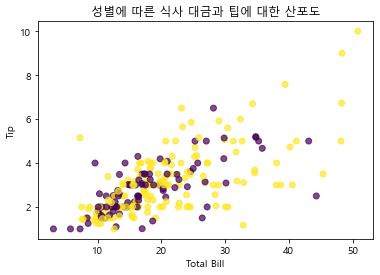

In [28]:
def record_sex(sex):
    if sex == "Female":
        return 0
    else:
        return 1
    
tips["sex_color"] = tips["sex"].apply(record_sex)
tips.head()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tips["total_bill"], tips["tip"], c=tips["sex_color"], alpha=0.7)

ax.set_title("성별에 따른 식사 대금과 팁에 대한 산포도")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

#### (4) 성별과 인원수에 따른 total_bill과 tip의 관계를 알고 싶다.

Text(0, 0.5, 'Tip')

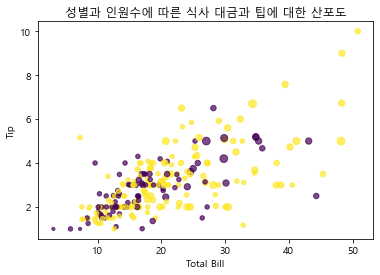

In [31]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(tips["total_bill"], tips["tip"], c=tips["sex_color"], alpha=0.7,
          s=tips["size"] * 10)

ax.set_title("성별과 인원수에 따른 식사 대금과 팁에 대한 산포도")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")

#### (5) 성별과 팁의 관계

Text(0, 0.5, 'Tip')

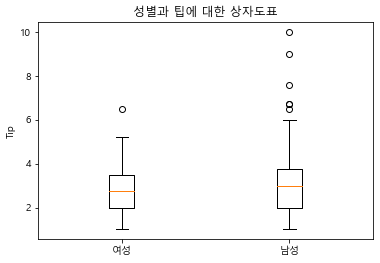

In [36]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.boxplot([tips[tips["sex"]=="Female"]["tip"], tips[tips["sex"]=="Male"]["tip"]],
          labels=["여성", "남성"])

ax.set_title("성별과 팁에 대한 상자도표")
ax.set_ylabel("Tip")

### 7. 활용 예제2

+ 전국 신규 민간아파트 분양가격 동향
+ https://data.go.kr/dataset/3035522/fileData.do

#### (1) 데이터 준비

In [54]:
apt = pd.read_csv("data/20200331.csv", encoding="euc-kr")
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4590 non-null   object
 1   규모구분     4590 non-null   object
 2   연도       4590 non-null   int64 
 3   월        4590 non-null   int64 
 4   분양가격(㎡)  4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


In [38]:
apt.head(10)

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
5,인천,전체,2015,10,3163
6,인천,전용면적 60㎡이하,2015,10,3488
7,인천,전용면적 60㎡초과 85㎡이하,2015,10,3119
8,인천,전용면적 85㎡초과 102㎡이하,2015,10,3545
9,인천,전용면적 102㎡초과,2015,10,3408


In [55]:
##### column 이름을 영어로 변경하고(city, size, year, month, price), price는 숫자로 변경

apt1 = apt
apt1.columns = ["city", "size", "year", "month", "price"]
apt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   city    4590 non-null   object
 1   size    4590 non-null   object
 2   year    4590 non-null   int64 
 3   month   4590 non-null   int64 
 4   price   4276 non-null   object
dtypes: int64(2), object(3)
memory usage: 179.4+ KB


In [56]:
apt1["price"] = pd.to_numeric(apt1["price"].str.strip())
apt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4590 entries, 0 to 4589
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    4590 non-null   object 
 1   size    4590 non-null   object 
 2   year    4590 non-null   int64  
 3   month   4590 non-null   int64  
 4   price   4260 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 179.4+ KB


In [57]:
%%time
##### 서울만 선택해서 "전체" size만 확인

apt_sa = apt1[(apt1["city"]=="서울") & (apt1["size"]=="전체")]

Wall time: 997 µs


In [47]:
%%time
apt1.query('(city=="서울") and (size=="전체")')

Wall time: 3.99 ms


,city,size,year,month,price
0,서울,전체,2015,10,5841.0
85,서울,전체,2015,11,6050.0
170,서울,전체,2015,12,6041.0
255,서울,전체,2016,1,6108.0
340,서울,전체,2016,2,6111.0
425,서울,전체,2016,3,6173.0
510,서울,전체,2016,4,6241.0
595,서울,전체,2016,5,6264.0
680,서울,전체,2016,6,6208.0
765,서울,전체,2016,7,6254.0


In [58]:
##### city, size 컬럼 삭제하고 다중 index로(year, month) 조정
apt_graph = apt_sa.drop(["city", "size"], axis=1)

In [59]:
apt_graph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 4505
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    54 non-null     int64  
 1   month   54 non-null     int64  
 2   price   54 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.7 KB


In [60]:
apt_graph = apt_graph.set_index(["year", "month"])
apt_graph.head(10)

price
year month        
2015 10     5841.0
     11     6050.0
     12     6041.0
2016 1      6108.0
     2      6111.0
     3      6173.0
     4      6241.0
     5      6264.0
     6      6208.0
     7      6254.0

<AxesSubplot:xlabel='year,month'>

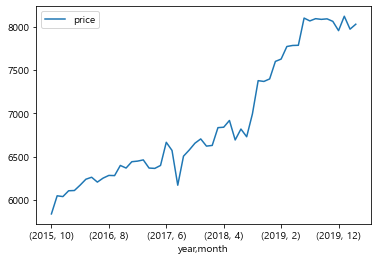

In [61]:
apt_graph.plot()

### 8. seaborn

In [62]:
tips = sns.load_dataset("tips")

Text(0, 0.5, 'total_bill')

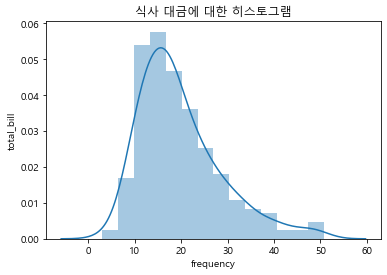

In [64]:
##### total_bill에 대한 금액 분포 확인

ax = sns.distplot(tips["total_bill"])

ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("total_bill")

Text(0, 0.5, 'total_bill')

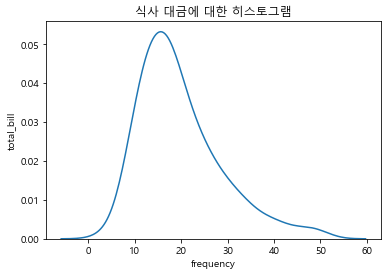

In [65]:
ax = sns.distplot(tips["total_bill"], hist=False)

ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("total_bill")

Text(0, 0.5, 'total_bill')

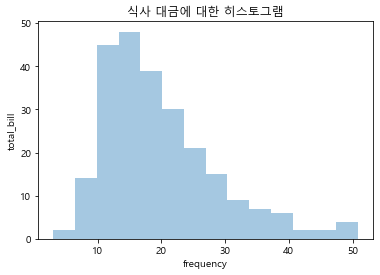

In [66]:
ax = sns.distplot(tips["total_bill"], kde=False)

ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("total_bill")

Text(0, 0.5, 'total_bill')

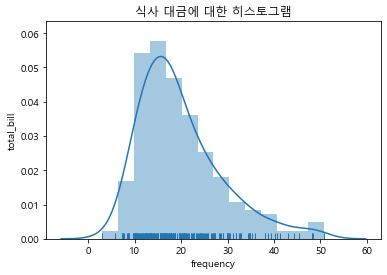

In [67]:
ax = sns.distplot(tips["total_bill"], rug=True)

ax.set_title("식사 대금에 대한 히스토그램")
ax.set_xlabel("frequency")
ax.set_ylabel("total_bill")

<AxesSubplot:xlabel='day', ylabel='count'>

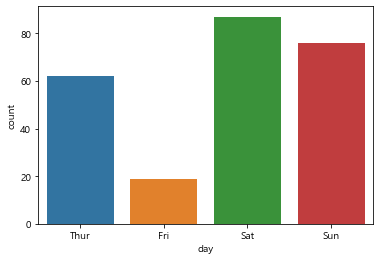

In [68]:
##### 요일별로 인원수 파악

sns.countplot("day", data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

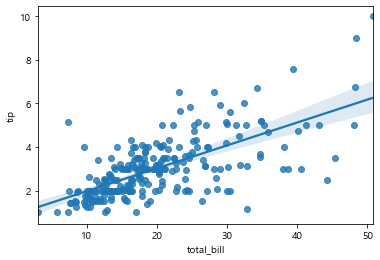

In [69]:
sns.regplot(x="total_bill", y="tip", data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

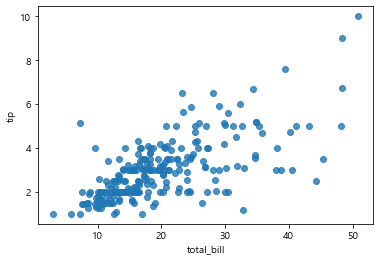

In [70]:
sns.regplot(x="total_bill", y="tip", data=tips, fit_reg=False)

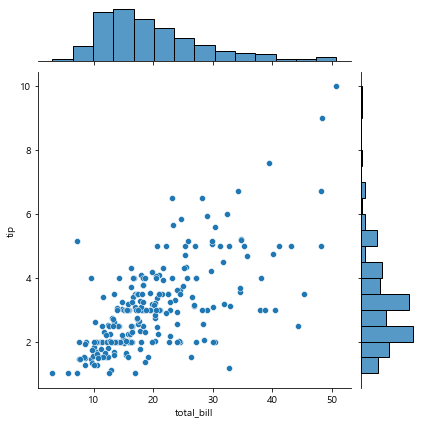

In [71]:
sns.jointplot(x="total_bill", y="tip", data=tips)

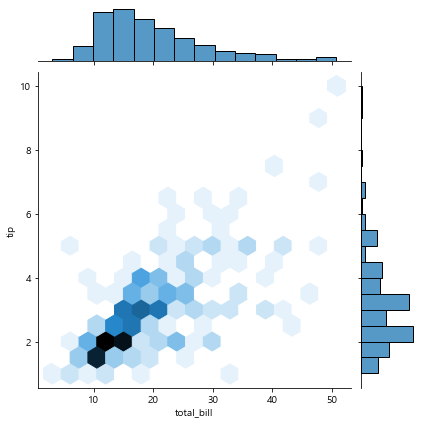

In [72]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

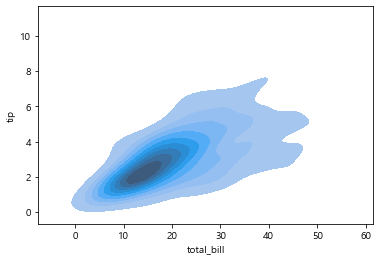

In [74]:
sns.kdeplot(x="total_bill", y="tip", data=tips, shade=True)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

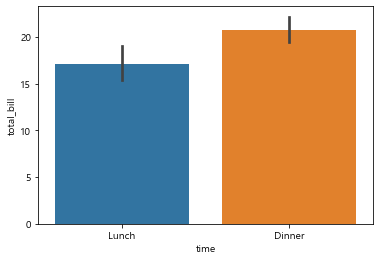

In [75]:
sns.barplot(x="time", y="total_bill", data=tips)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

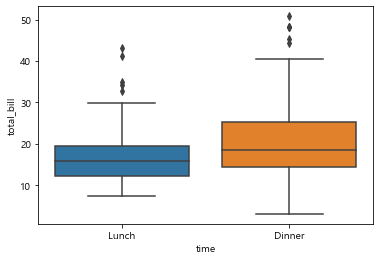

In [76]:
sns.boxplot(x="time", y="total_bill", data=tips)

<AxesSubplot:xlabel='time', ylabel='total_bill'>

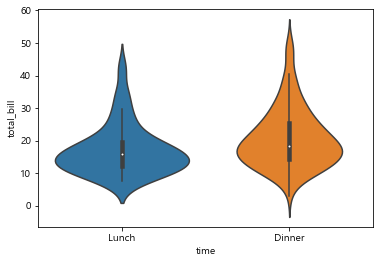

In [77]:
sns.violinplot(x="time", y="total_bill", data=tips)

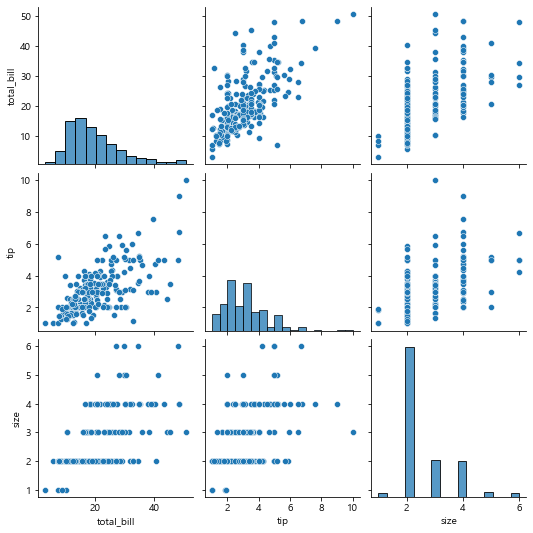

In [78]:
sns.pairplot(tips)

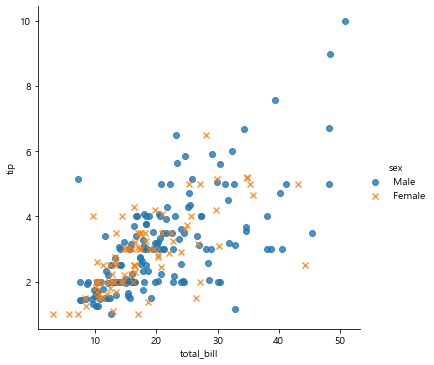

In [82]:
### 성별에 따른 total_bill과 tip의 관계를 알고 싶다.

sns.lmplot(x="total_bill", y="tip", data=tips, fit_reg=False, hue="sex",
          markers=["o", "x"])

### 9. 활용 예제

+ 타이타닉 샘플 : https://www.kaggle.com/c/titanic

#### (1) 데이터 준비

In [99]:
train = pd.read_csv("data/train.csv")
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [85]:
train.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [86]:
##### 결측치 확인

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### (2) EDA(Explorer Data Analysis)

In [92]:
def bar_chart(feature):
    survived = train[train["Survived"]==1][feature].value_counts()
    dead = train[train["Survived"]==0][feature].value_counts()
    
    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]
    df.plot(kind="bar", stacked=True, figsize=(10, 5))

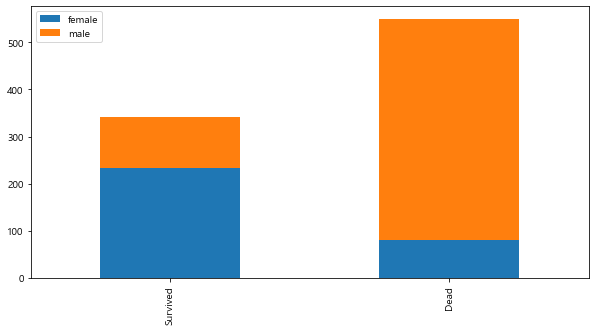

In [93]:
##### 성별에 따른 생존 여부
bar_chart("Sex")

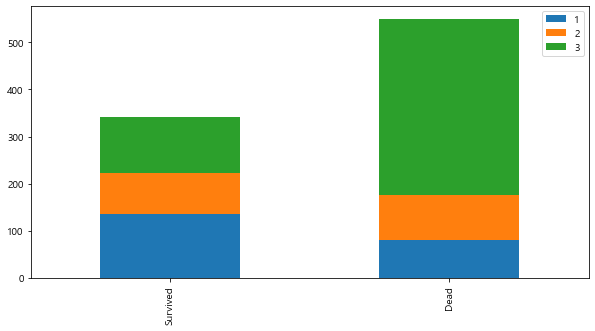

In [94]:
##### 객실등급에 따른 생존 여부
bar_chart("Pclass")

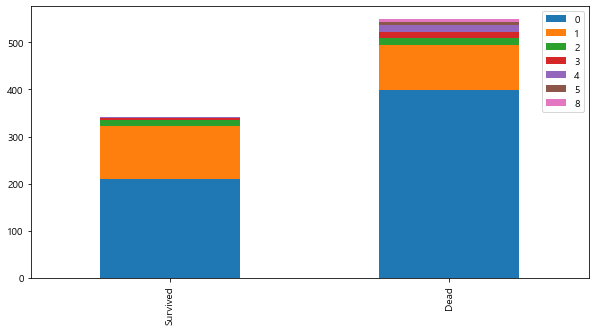

In [96]:
##### 동승(자매와 배우자)여부에 따른 생존 여부
bar_chart("SibSp")

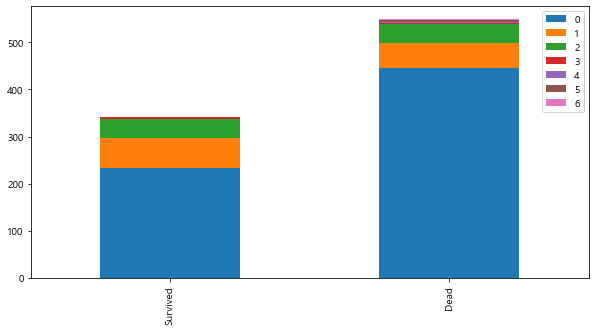

In [97]:
##### 동승(부모와 자식)여부에 따른 생존 여부
bar_chart("Parch")

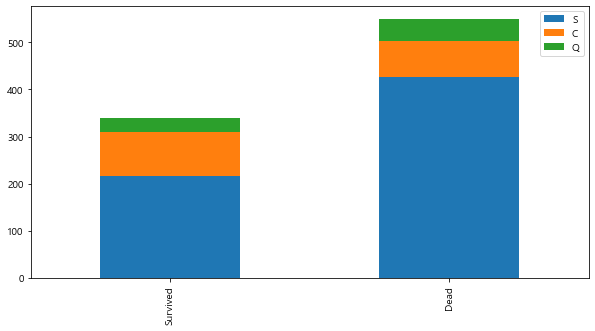

In [98]:
##### 정박지에 따른 생존 여부
bar_chart("Embarked")

#### (3) Feature Engineering

In [ ]:
##### 이름에서 호칭에 대한 부분 추출하기